<img src="https://github.com/sachinac/MSDS7333/blob/main/case_study04/img/case_study04_title.png?raw=true" width="100%" align="left"> 



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1">Import modules</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span></li><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-3">Business Understanding</a></span><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-3.1">Objective</a></span></li></ul></li><li><span><a href="#Data-Extraction-and-Evaluation" data-toc-modified-id="Data-Extraction-and-Evaluation-4">Data Extraction and Evaluation</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-4.1">Load data</a></span></li><li><span><a href="#Structure-of-the-data" data-toc-modified-id="Structure-of-the-data-4.2">Structure of the data</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.3">Summary</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-4.4">Missing values</a></span></li><li><span><a href="#Assumptions-and-Constraints" data-toc-modified-id="Assumptions-and-Constraints-4.5">Assumptions and Constraints</a></span></li><li><span><a href="#Train/Test-Split" data-toc-modified-id="Train/Test-Split-4.6">Train/Test Split</a></span><ul class="toc-item"><li><span><a href="#Plot-the-data" data-toc-modified-id="Plot-the-data-4.6.1">Plot the data</a></span></li><li><span><a href="#Stationarity----Visual-Inspection" data-toc-modified-id="Stationarity----Visual-Inspection-4.6.2">Stationarity -  Visual Inspection</a></span></li><li><span><a href="#Stationarity---Statistical-Analysis" data-toc-modified-id="Stationarity---Statistical-Analysis-4.6.3">Stationarity - Statistical Analysis</a></span></li><li><span><a href="#DF-Test" data-toc-modified-id="DF-Test-4.6.4">DF Test</a></span></li><li><span><a href="#Additional-plots" data-toc-modified-id="Additional-plots-4.6.5">Additional plots</a></span></li><li><span><a href="#Seasonality" data-toc-modified-id="Seasonality-4.6.6">Seasonality</a></span></li><li><span><a href="#EDA-Coclusion" data-toc-modified-id="EDA-Coclusion-4.6.7">EDA Coclusion</a></span></li></ul></li></ul></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-5">Model Building</a></span><ul class="toc-item"><li><span><a href="#Find-Order-of-Differencing" data-toc-modified-id="Find-Order-of-Differencing-5.1">Find Order of Differencing</a></span><ul class="toc-item"><li><span><a href="#Non-Seasonal---First-differencing" data-toc-modified-id="Non-Seasonal---First-differencing-5.1.1">Non-Seasonal - First differencing</a></span></li><li><span><a href="#Seasonal-Differencing" data-toc-modified-id="Seasonal-Differencing-5.1.2">Seasonal Differencing</a></span></li></ul></li><li><span><a href="#Find-order--of-AR-term-p-and-MA-term--q" data-toc-modified-id="Find-order--of-AR-term-p-and-MA-term--q-5.2">Find order  of AR term p and MA term  q</a></span><ul class="toc-item"><li><span><a href="#ACF-and-PACF-Plots" data-toc-modified-id="ACF-and-PACF-Plots-5.2.1">ACF and PACF Plots</a></span></li></ul></li><li><span><a href="#Identified-Model" data-toc-modified-id="Identified-Model-5.3">Identified Model</a></span></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-5.4">Model Building</a></span></li></ul></li><li><span><a href="#Forecasting" data-toc-modified-id="Forecasting-6">Forecasting</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7">Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8">References</a></span></li></ul></div>

# Import modules

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pickle

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error


In [89]:
def test_stationarity(timeseries,lag_range):

    #Determing rolling statistics
    rolmean = timeseries.rolling(lag_range).mean() #pd.rolling_mean(timeseries, window=52)
    rolstd  = timeseries.rolling(lag_range).std() #pd.rolling_std(timeseries, window=52)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)   

def plot_forecast(test_ts, fore_ts, p_title=NULL, p_xtitle=NULL, p_ytitle=NULL ,plot=FALSE) {
  
  if( plot == TRUE ) {

     len_ts = len(test_ts)
      x   = [i for i in range(1, len)]
      y   = test_ts
     
     ase <- np.mean((test_ts-fore_ts$f)^2)
     p_title <- paste0(p_title," ASE - ",round(ase,2))
     
     fig <- plot_ly()
     fig <- fig %>% add_lines(x = x, y = y, color = I("black"), name = "observed" )
     fig <- fig %>% add_lines(x = x, y = fore_ts$f, color = I("blue"), name = "prediction")
     fig <- fig %>% add_ribbons(x = x, ymin = fore_ts$ll, ymax = fore_ts$ul, color = I("grey"), name = "95% confidence")
     fig <- fig %>% layout(title = p_title, xaxis = list(title = p_xtitle), yaxis = list (title = p_ytitle))
  
     fig
    
  }
}    
    

# Introduction


**Influenza** most commonly known as **flu** is an infectious respiratory disease caused by virus. There four known variants of the Influenza. Type A , Type B, Type C and Type D. Based on historical data it occurs in winter or in monsoon season. There are several studies have been conducted on the causes of occurring in the specific season and one of the study has linked it to vitamin D levels in human $^{[1]}$. It's during winter or rainy season when people stay mostly indoors and are less expose to sun causing the fall of levels of vitamin D in people. Staying inside homes has also been seen as one of the reason of transmission the disease as people are in close contact of each other. That explains a bit of seasonal occurrence of the flu every year. These viruses infect nose, throat and lungs and leads to mild to severe illness and has been observed that it can also lead to death of proper attention is not given.

   Data shows that globally on an average 389K deaths occurs due to flu and it mostly affect people who are above 60 years of age $^{[2]}$. In the United States alone more than 200K hospitalization are due to Influenza every year $^{[3]}$. [Centers for Disease Control and Prevention](https://www.cdc.gov/) has reported range of death is between 3500 and 49K every year and costs the U.S. economy more than 10 billions dollars $^{[4]}$.Out of many strains of the viruses few have potential to create pandemics/epidemics. One the deadliest pandemic occurred in year 1918 which infected 33\% of the world population and caused 100 million deaths worldwide. It has been observed that such or less severe pandemic occurs 3 times in a century. As this is repeating phenomenon it becomes important to gather data on infection to take precautionary steps to contain the impact of virus to protect most vulnerable population. It helps to control and respond proactively to spread of the disease, arranging medical treatments accordingly and alert health officials in advance which potentially stops to become pandemic.

World Health Organization (WHO) plays an important role in keeping watch on such diseases as it occurs across the world. They established [Global Influenza Surveillance and Response System (GISRS)](http://www.who.int/influenza/gisrs_laboratory/en/) in 1952 to monitor Influenza and different strains and changes in viruses with the goal of reducing its impact and providing guidance to researchers to develop/enhance vaccine. Centers for Disease Control and Prevention and WHO works together to contain the virus and protect vulnerable population in the country.

With this initial background this case study provides different insights from the [data](https://gis.cdc.gov/grasp/fluview/fluportaldashboard.html) that is publicly available on WHO's website. Study will analyze trends in the data to develop model to 2 week forecast of infections details of which is available in later section of this document.

# Business Understanding

The Influenza causes significant impact on the economy and puts additional burden health system every year. According to data adults with certain medical conditions and people above 60 years of age particularly affected by flu badly the end results in hospitalization. Sudden increase in patients puts pressure on Hospitals, Doctors, nurses and eventually affects treatments of patients. Knowing that such a diseases occurs every year requires monitoring, data collection and planning. There are several ways to control getting into such situation. Once of the way is vaccination before winter or monsoon starts, spreading awareness , face-masking etc. Another way to go one step further and provide forecast so that preventive actions can be taken at right time.Forecast can provide guidence to logistics for healthcare, e.g. start time of vaccinations, medical staff, arranging medicines, medical equipmments only when it is needed, alerting citizens to take precautionary steps like washing hands, physical distancing, using face masks etc. Which eventually may help to reduce number of patients and in turn pressure on health agencies. Therefore it is important to monitor such diseases by the way of collecting health data on regular basis so that preventive actions can be taken, to alert Health organizations in advance. 

For the purpose of this case study time series data on outpatient visits to providers for influenza like illness will be studied to build 5 week forecast using sophisticated time series techiques. CDC collects this weekly Influenza like illness data from all outpatient providers across all 50 statems through **U.S. Outpatient Influenza-like Illness Surveillance Network**(ILINET). This ILINet data is available for year 1997-2021. This data will be analyzed to build time series model to forecast number of postive cases for next 8 weeks. This is going to be Univariate time series analysis as data does not contain other factors that may be responsible for number of indicidences. It is known at the time of beginining of the analysis that Influenza like illness is seasonal it occures during winter or monosoon season so it is expected that data to have seaonal component and timesheet is expected to be non-stationary. But analysis will reveal the nature of the data.

## Objective

Download historical [data](https://gis.cdc.gov/grasp/fluview/fluportaldashboard.html) that is available on the WHO website and build and evaluate a time series model (ARIMA/SARIMA) to provide accurate forecast of Influenza incidences.



# Data Extraction and Evaluation

Data was downloaded from [www.cdc.gov](https://gis.cdc.gov/grasp/fluview/fluportaldashboard.html). This is weekly outpatient data from Influenza-like Illness Surveillance Network, or **ILINet** which contains number of providers and patients and other stats for whole year starting from week 40 of year 1997 to week 6 of year 2021. Total observations in this dataset are 1217. US Centers for Disease Control and Prevention and state health departments collects influensa surveillance data collected from healthcare providers.



## Load data

In [5]:
url="https://raw.githubusercontent.com/sachinac/MSDS7333/main/case_study04/data/ILINet.csv"
fludata=pd.read_csv(url)
fludata.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,1997,40,1.10148,1.21686,179,X,157,205,X,29,570,192,46842
1,National,X,1997,41,1.20007,1.28064,199,X,151,242,X,23,615,191,48023
2,National,X,1997,42,1.37876,1.23906,228,X,153,266,X,34,681,219,54961
3,National,X,1997,43,1.19920,1.14473,188,X,193,236,X,36,653,213,57044
4,National,X,1997,44,1.65618,1.26112,217,X,162,280,X,41,700,213,55506


This is national Influenza data obtained from outpaient providers throug ILInet is quite self-explantory. 
* Total Patients - Number of patients visited to providers for the given weeek
* Number of Providers - Number providers that submitted patients data to CDS
* **ILITTotal** - Total Patients that are diagnozed and turned postive for influenza like illness
* Age 25-49,5-24,50-64, 65 - Total positive Influenza like illness in different age groups
* Unweighted - Percentage of Influenza Postive patients
* Week - Week in which data was submitted to CDS
* Year - Year when data was submitted.

**ILITotal** will be studied and forecast will be provided on ILITotal i.e. number of patients for next 4 weeks.

## Structure of the data 

In [6]:
fludata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REGION TYPE        1220 non-null   object 
 1   REGION             1220 non-null   object 
 2   YEAR               1220 non-null   int64  
 3   WEEK               1220 non-null   int64  
 4   % WEIGHTED ILI     1220 non-null   float64
 5   UNWEIGHTED ILI     1220 non-null   float64
 6   AGE 0-4            1220 non-null   int64  
 7   AGE 25-49          1220 non-null   object 
 8   AGE 25-64          1220 non-null   object 
 9   AGE 5-24           1220 non-null   int64  
 10  AGE 50-64          1220 non-null   object 
 11  AGE 65             1220 non-null   int64  
 12  ILITOTAL           1220 non-null   int64  
 13  NUM. OF PROVIDERS  1220 non-null   int64  
 14  TOTAL PATIENTS     1220 non-null   int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 143.1+ KB


## Summary 

In [7]:
fludata.describe()

,YEAR,WEEK,% WEIGHTED ILI,UNWEIGHTED ILI,AGE 0-4,AGE 5-24,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1.220000e+03
mean,2008.928689,26.703279,1.773753,1.700802,2771.085246,4035.495082,697.329508,10926.902459,1311.213934,5.219077e+05
std,6.758509,15.187550,1.431055,1.340334,3087.588240,5613.912368,1014.761232,14282.927124,813.032039,3.850975e+05
min,1997.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2003.000000,13.750000,0.879713,0.890790,602.000000,751.750000,137.750000,2149.250000,606.000000,1.675415e+05
50%,2009.000000,27.000000,1.342605,1.280695,1896.000000,2340.000000,375.000000,6592.000000,1356.500000,5.402825e+05
75%,2015.000000,40.000000,2.257150,2.103883,3739.250000,4904.750000,753.500000,14068.500000,1921.250000,7.794160e+05
max,2021.000000,53.000000,7.715100,7.780900,24097.000000,45513.000000,6986.000000,111361.000000,3435.000000,1.635350e+06


## Missing values

As it happens with traditional dataset, missing data prolem also occurs with time series data and if it occurs it must be handled before the data can be further preprocessed and analyzed. Sometimes the missing records are a part of the dynamics of the time series, for example, a stock market closes on a Friday and opens on a Monday. This case study is about Influenza incidences every year. So it is known fact that this is seasonal occurence so data may not be collected or it is not at all available for the period when there is no outbreak. **As per indicated below the dataset doesn't contain a missing values**.

The statistical characteristics of time series data often violate the assumptions of conventional statistical methods. Because of this, analyzing time series data requires a unique set of tools and methods, collectively known as time series analysis.

## Assumptions and Constraints

* Our data clearly indicates that the flu patient are increaing from year to year. this make sense because, world population is increasing, thus the number of people having the flu is also rising every year. The other thing is the seasonality of this data is also clearly visible. In some week the incidences are high and some week it drops. 
* This case stduy intends to perform univariate analysis as there are no other variables involved in the dataset that may have impact on total number of patients every year.

## Train/Test Split

In [14]:
print("Total number of datapoints in the original timeseries: " + str(fludata.shape[0]))
trainDataSplit  = 0.9
trainDataPoints = int(fludata.shape[0] * trainDataSplit)
train_ts = fludata.iloc[0:trainDataPoints, ]
print("Total number of datapoints in the train timeseries: " + str(train_ts.shape[0]))

Total number of datapoints in the original timeseries: 1220
Total number of datapoints in the train timeseries: 1098


In [80]:
test_ts = fludata.iloc[trainDataPoints:len(fludata), ]
print("Total number of datapoints in the test timeseries: " + str(test_ts.shape[0]))

Total number of datapoints in the test timeseries: 122


### Plot the data 

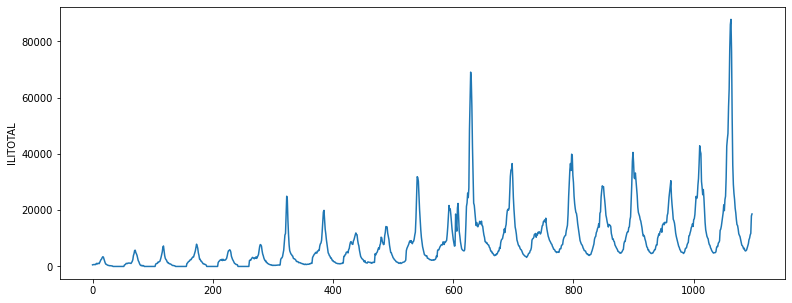

In [15]:
plt.figure(figsize=(13,5))
x = sns.lineplot(x=train_ts.index, y=train_ts.iloc[:,12], data=train_ts)
plt.show()

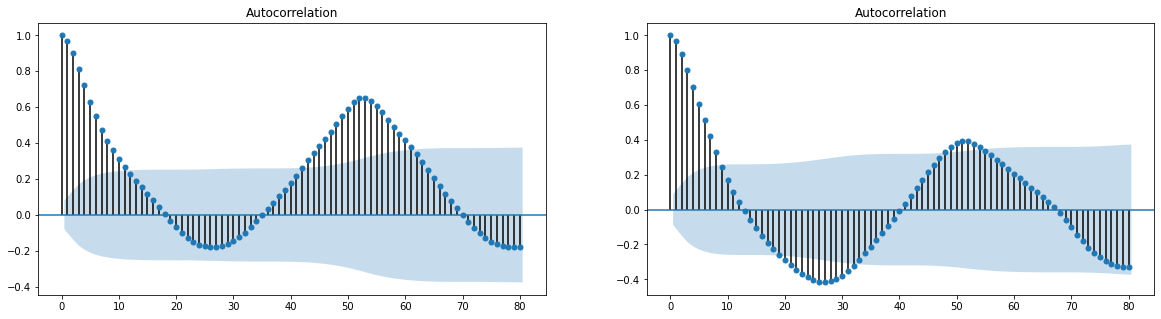

In [45]:
fig, ax = plt.subplots(1, 2,figsize=(20,5))
sm.graphics.tsa.plot_acf(train_ts.iloc[:600,12],lags=80,ax=ax[0])
sm.graphics.tsa.plot_acf(train_ts.iloc[600:,12],lags=80,ax=ax[1])
plt.show()

### Stationarity -  Visual Inspection

**Constant Mean**

From the time series plot above mean appears to be constant. This does not violate stationarity assumption.

**Constant Variance**

From the time series plot we can see that variance is increasing in later part of time series. So Variance is not constant. <font color="red">This violates stationarity assumption.</font>

**Constant Autocorrelation**

Second Autocorrelation plot above shows first half and second half of autocorrelations are almost same. This does not violate stationarity assumption.

So one out of three condition appears to violate stationarity assumption. So Visual inspection indicates <font color="red">time series is not stationary.</font>


### Stationarity - Statistical Analysis 

### DF Test

Dicky Fuller Test is used to test presence of unit root.

$H_0$ : Model has unit root.

$H_a$ : Model doesn't have unit root.

In [46]:
dftest = adfuller(train_ts.iloc[:,12], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -5.990891e+00
p-value                        1.746763e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.086000e+03
Critical Value (1%)           -3.436386e+00
Critical Value (5%)           -2.864205e+00
Critical Value (10%)          -2.568189e+00
dtype: float64


**DF-Test** provides significant evidence (p-value < 0.05) against null hypothesis that unit root is present.

### Additional plots 

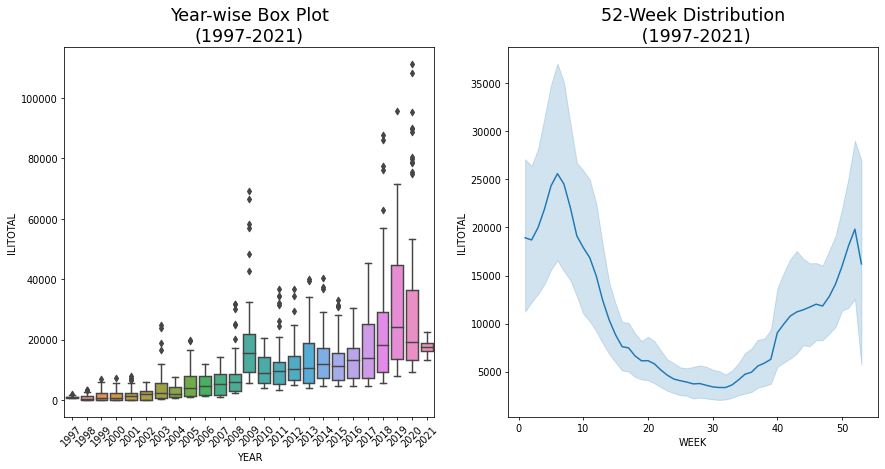

In [30]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(15,7), dpi= 70)
box  = sns.boxplot(x='YEAR', y=fludata.iloc[:,12], data=fludata, ax=axes[0])
sns.lineplot(x='WEEK', y=fludata.iloc[:,12], data=fludata, ax=axes[1])
# Set Title
axes[0].set_title('Year-wise Box Plot\n(1997-2021)', fontsize=18); 
axes[1].set_title('52-Week Distribution\n (1997-2021)', fontsize=18)
box.set_xticklabels(box.get_xticklabels(),rotation=45)
plt.show()

**Box Plot**
Boxplot on the left shows distribution of total number of positive cases for 1997-2021. As we can see total number of positive cases seems to be increasing steadily over the years and lately it has even peaked at 100K. 

**Line Plot**
Line plot on the right shows 52 week distribution for the years 1997-2021. As shown it is clear that number of positive cases goes up during first few weeks and last few weeks. This is the period when US experiences winter. For remaining period total number of postive influenza cases is realtively quite low. This confirms Seasnoality in the data.



### Seasonality

It is quite clear from the visual inspection that seasoanlity is present in the data. Influenza peak is very common during winter and occurs once in a year. Seasonal differencing is also required.


### EDA Coclusion

This EDA analysis concludes that unit root and seasonality is present in the data and thats why ARIMA or S-ARIMA model may be appropriate for forecast that is required from this data.

# Model Building

ARIMA stands for Autoregressive Integrated Moving Average model. Non-Stationary data with linear trend can be modeled as ARIMA. In our case we found in previous steps that our data contains unit root. Unit root is non-stationary component which can be removed by the way of differencing. Number of differencing is determined by residuals. More differencing is required if after every differencing if residuals are not white noise. Once residual are found white noise. No more differencing is required.

ARIMA model is made up of three components

p= Order of AR Model

d= Differencing required

q= Order or MA Model

AR - Autoregressive Component - Time series depends on its own lags.

MA - Moving Average Component - Time series depends on lagged forecast errors.


## Find Order of Differencing

### Non-Seasonal - First differencing

DF test in previous section provides significant evidence against null hypothesis that Unit root present. Therefore order of difference for our data is **d=0**

### Seasonal Differencing 

Seasonal Differecing is obtained with m=52. Number of weeks in year as our data is weekly.

In [56]:
import warnings
warnings.filterwarnings('ignore')

train_ts['seasonal_dff'] = train_ts.iloc[:,12] - train_ts.iloc[:,12].shift(52)

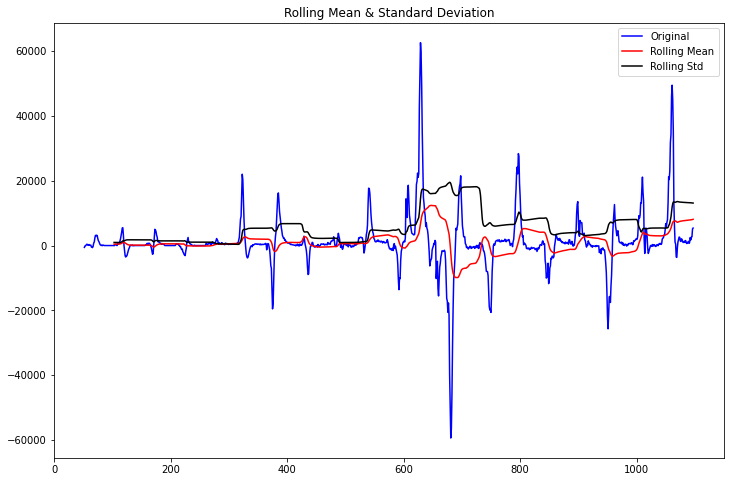

Results of Dickey-Fuller Test:
Test Statistic                -8.558355e+00
p-value                        8.832717e-14
#Lags Used                     6.000000e+00
Number of Observations Used    1.039000e+03
Critical Value (1%)           -3.436659e+00
Critical Value (5%)           -2.864326e+00
Critical Value (10%)          -2.568253e+00
dtype: float64


In [59]:
test_stationarity(train_ts['seasonal_dff'].dropna(inplace=False),52)

**DF-Test** provides significant evidence (p-value < 0.05) against null hypothesis that unit root is present. So first differencing makes times series stationary. So Seasonal order is **52**

In [60]:
train_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REGION TYPE        1098 non-null   object 
 1   REGION             1098 non-null   object 
 2   YEAR               1098 non-null   int64  
 3   WEEK               1098 non-null   int64  
 4   % WEIGHTED ILI     1098 non-null   float64
 5   UNWEIGHTED ILI     1098 non-null   float64
 6   AGE 0-4            1098 non-null   int64  
 7   AGE 25-49          1098 non-null   object 
 8   AGE 25-64          1098 non-null   object 
 9   AGE 5-24           1098 non-null   int64  
 10  AGE 50-64          1098 non-null   object 
 11  AGE 65             1098 non-null   int64  
 12  ILITOTAL           1098 non-null   int64  
 13  NUM. OF PROVIDERS  1098 non-null   int64  
 14  TOTAL PATIENTS     1098 non-null   int64  
 15  seasonal_dff       1046 non-null   float64
dtypes: float64(3), int64(8),

## Find order  of AR term p and MA term  q

### ACF and PACF Plots

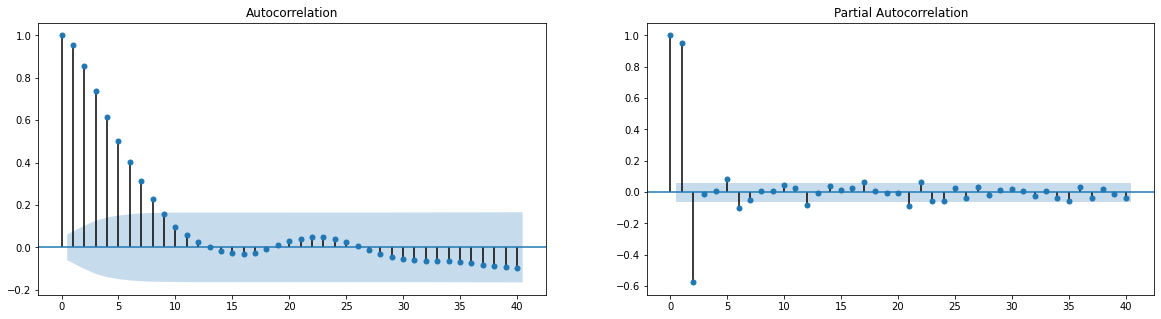

In [63]:
fig, ax = plt.subplots(1, 2,figsize=(20,5))
sm.graphics.tsa.plot_acf(train_ts.iloc[:,15].dropna(),lags=40,ax=ax[0])
sm.graphics.tsa.plot_pacf(train_ts.iloc[:,15].dropna(),lags=40,ax=ax[1])
plt.show()

**Order of AR Term (p)**

Order of AR term i.e. Autoregressive Model can be found from PACF plot. Partial Autocorrelation is difference between series and lag. Above ACF and PACF plots are obtained after seasonal differecing the data nad First three lags appears to be significant i.e. aboves siginficance line there fore Order of AR term is 3.

p=3


**Order of MA Term (q)**


MA term are Moving Average Term which are nothing but error of lagged forecast. MA term can be obtained from ACF plots. Above plot shows first 4 lags are significant (autocorrelation >0.6) and well above significance line. Therefore order of MA term is 4.

q=4




## Identified Model

Model Identified is ARIMA(p=3,d=0,q=4) Seasonal component (52)

Due to seasonal component S-ARIMA model would be appropriate to build.

## Model Building

In [65]:
import statsmodels.api as sm
from os import path

if(path.exists("data/smodel_fit.p")):
    print('Exists')  
    smodel_fit = pickle.load(open("data/smodel_fit.p", "rb")) 
else:    
    print('does not') 
    smodel = sm.tsa.statespace.SARIMAX(train_ts.iloc[:,12].dropna(), order=(3,0,4),trend='n',seasonal_order=(3,0,4,52)) 
    smodel_fit = smodel.fit(disp=0)
    pickle.dump( smodel_fit, open( "data/smodel_fit.p", "wb" ) )
    print(smodel_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           ILITOTAL   No. Observations:                 1098
Model:             SARIMAX(3, 0, 4)x(3, 0, 4, 52)   Log Likelihood               -9714.688
Date:                            Tue, 02 Mar 2021   AIC                          19459.377
Time:                                    05:11:16   BIC                          19534.396
Sample:                                         0   HQIC                         19487.760
                                           - 1098                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3277      0.191      1.719      0.086      -0.046       0.701
ar.L2          0.5462      0.261   

# Forecasting

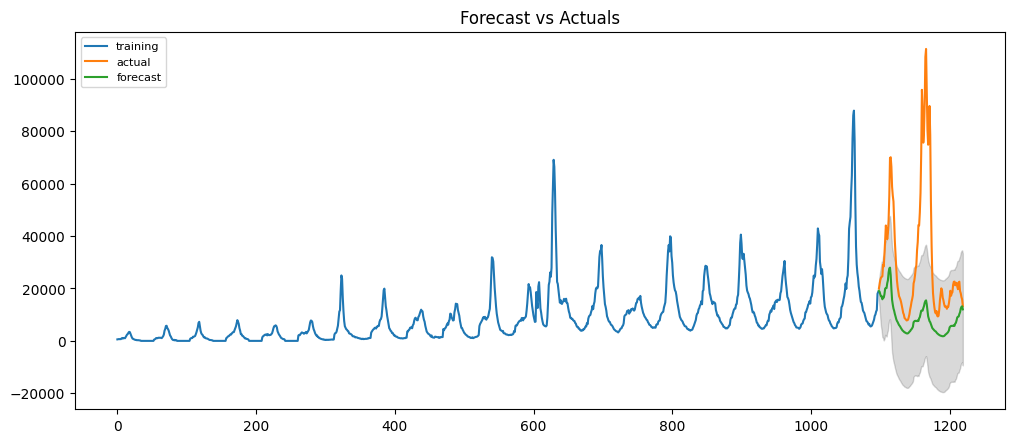

In [83]:
pred = smodel_fit.get_forecast(steps=122)
pred_ci = pred.conf_int()

sfc_series = pd.Series(pred.summary_frame()['mean'].values, index=test_ts.index)
slower_series = pd.Series(pred_ci.iloc[:,0].values, index=test_ts.index)
supper_series = pd.Series(pred_ci.iloc[:,1].values, index=test_ts.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_ts.iloc[:,12], label='training')
plt.plot(test_ts.iloc[:,12], label='actual')
plt.plot(sfc_series, label='forecast')
plt.fill_between(slower_series.index, slower_series, supper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [92]:
trainSize = 40
horizon   = 20
series_length = len(train_ts.iloc[:,12].dropna()) + len(test_ts.iloc[:,12].dropna())  

series_length

1220

In [94]:
# Rolling window ASE

#ASEHolder1 = [] 

#for( i in 1:(series_length-(trainSize + horizon) + 1))  {
#     
#    pred = smodel_fit.get_forecast(steps=trainSize+i-1)

#    sfc_series = pd.Series(pred.summary_frame()['mean'].values, index=test_ts.index)
    
#    preds=predict(lsfit,n.ahead=10,newdata=final_ts$Xt[i:(trainSize+i-1)])
     
#    PM25Forcasts  <- preds$fcst$Xt[,1:3]
#    mean_squared_error(y_actual, y_predicted, squared=False) 
#    
#    ASE1 <- mean((X[(trainSize+i):(trainSize+i+horizon-1),1] - PM25Forcasts[,1])^2)

#    ASEHolder1.append(ASE1)

    
    
#    fore.mlp <- forecast::forecast(fit.mlp,newdata=final_ts$Xt[i:(trainSize+i-1)], h = 10, xreg = mlpTestDF)
##    ASE2 = mean((final_ts$Xt[(i+trainSize):(trainSize+i+horizon-1)] - fore.mlp$mean)^2)#
#    ASEHolder2[i] <- ASE2
    
#    ensemble = (fore.mlp$mean + preds$fcst$Xt[,1])/2
    
#    ASE3 = mean((final_ts$Xt[(i+trainSize):(trainSize+i+horizon-1)] - ensemble)^2)
    
 #   ASEHolder3[i] <- ASE3
 # }   





# Conclusion

# References 

1.  Cannell JJ, Vieth R, Umhau JC, Holick MF, Grant WB, Madronich S, et al. (December 2006). "Epidemic influenza and vitamin D". Epidemiology and Infection. 134 (6): 1129–40. doi:10.1017/S0950268806007175. PMC 2870528. PMID 16959053.
2. Paget J, Spreeuwenberg P, Charu V, Taylor RJ, Iuliano AD, Bresee J, et al. (December 2019). "Global mortality associated with seasonal influenza epidemics: New burden estimates and predictors from the GLaMOR Project". Journal of Global Health. 9 (2): 020421. doi:10.7189/jogh.09.020421. PMC 6815659. PMID 31673337.
3.  Thompson WW, Shay DK, Weintraub E, Brammer L, Cox N, Anderson LJ, et al. (January 2003). "Mortality associated with influenza and respiratory syncytial virus in the United States". JAMA. 289 (2): 179–86. doi:10.1001/jama.289.2.179. PMID 12517228. S2CID 5018362.
4. [Small Business and Technology Development Center article ](https://sbtdc.org/resources/recovery/pandemic-flu/)